**This notebook provides a detailed analysis of the Top 10 countries with the most coronavirus cases. This is a countinuation of my previous analysis on the growth of coronavirus cases (link to previous notebook below). **
> **Coronavirus (COVID-19) Bar Chart Race:
http://www.kaggle.com/minaliu314/coronavirus-covid-19-bar-chart-race**

![](https://estaticos.elperiodico.com/resources/jpg/5/9/1583931660595.jpg)

## **Syllabus of this notebook:**
* **initial exploratory data analysis**
* **data visualization of confirmed cases in different countries**
* **confirmed cases trends in 10 countries with the most cases**
* **in-depth analysis on US coronavirus cases**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-dataset/new_deaths.csv
/kaggle/input/covid19-dataset/new_cases.csv
/kaggle/input/covid19-dataset/total_deaths.csv
/kaggle/input/covid19-dataset/total_cases.csv
/kaggle/input/covid19-dataset/full_data.csv
/kaggle/input/covid19-dataset/locations.csv


# **Exploratory Data Analysis**

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read files
totalCases = pd.read_csv("../input/covid19-dataset/total_cases.csv")
totalDeath = pd.read_csv("../input/covid19-dataset/total_deaths.csv")
newDeath = pd.read_csv("../input/covid19-dataset/new_deaths.csv")
newCases = pd.read_csv("../input/covid19-dataset/new_cases.csv")

**Get the last day's data of "World" and "China" from dataset**

In [4]:
world_confirmed_cases = totalCases['World'].iloc[-1]
china_confirmed = totalCases['China'].iloc[-1]
outside_china_confirmed = totalCases['World'].iloc[-1] - totalCases['China'].iloc[-1]

In [5]:
endDate = totalCases['date'].max()
print(f'{endDate}')
print()
print('Outside China:   {} cases'.format(outside_china_confirmed))
print('China:\t\t {} cases'.format(china_confirmed))
print('Total:\t\t {} cases'.format(world_confirmed_cases))

2020-04-23

Outside China:   2504192 cases
China:		 83876 cases
Total:		 2588068 cases


**Let's see more clearly through bar chart (It’s shocking how quickly this virus spread)**

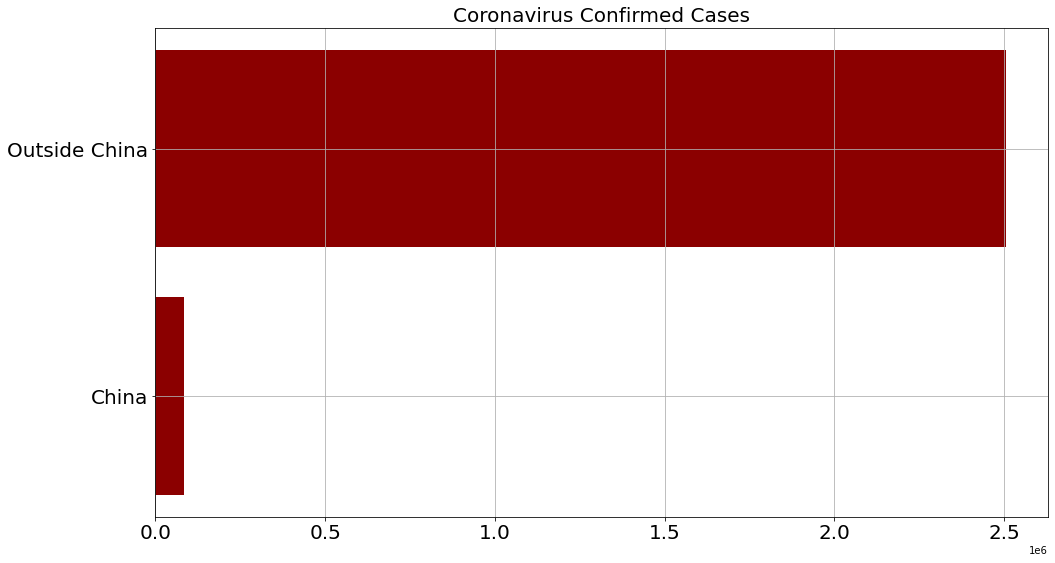

In [6]:
names = ['China','Outside China']
values = [china_confirmed, outside_china_confirmed]
plt.figure(figsize=(16, 9))
plt.barh(names,values,color='darkred')
plt.title('Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()
plt.show()

## **Q: Are there some countries that have not been infected so far? Which country has the most confirmed cases now?**
***We guess US has the most cases, let's check if it is right.***

**We can see the number of cases in each country on the last day of the dataset**

In [7]:
df1 = totalCases.tail(1)
df1

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
114,2020-04-23,2588068,1176.0,634.0,2910.0,723.0,24.0,3.0,24.0,3276.0,...,842629,54.0,549.0,1716.0,9.0,288.0,268.0,1.0,74.0,28.0


**Remove first two columns () to get only country data**

**We got 206 countries, let's see if there are some countries have not been infected (means the cases is 0)**

In [8]:
df2 = df1.drop(df1.columns[[0,1]], axis = 1)
df2

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
114,1176.0,634.0,2910.0,723.0,24.0,3.0,24.0,3276.0,1523.0,100.0,...,842629,54.0,549.0,1716.0,9.0,288.0,268.0,1.0,74.0,28.0


## **We can see 206 countries have already been infected**

In [9]:
df2.fillna(0)
np.count_nonzero(df2)

206

## **As we see, US has the most confirmed cases right now**

In [10]:
df2.idxmax(axis = 1)

114    United States
dtype: object

# **Data Visualization of Confirmed Cases in Different Countries**

**Find the Top 10 countries that have the most confirmed cases**

In [11]:
df = pd.read_csv("../input/covid19-dataset/full_data.csv",
                 usecols=['date','location','total_cases'])
df.drop(df[df['location'] == 'World' ].index, inplace=True)
end = df['date'].max()
dff = (df[df['date'].eq(end)]
       .sort_values(by='total_cases', ascending=False).head(10))
dff

,date,location,total_cases
12211,2020-04-23,United States,842629
10822,2020-04-23,Spain,208389
6097,2020-04-23,Italy,187327
4494,2020-04-23,Germany,148046
12096,2020-04-23,United Kingdom,133495
4153,2020-04-23,France,119151
11768,2020-04-23,Turkey,98674
5610,2020-04-23,Iran,85996
2513,2020-04-23,China,83876
9778,2020-04-23,Russia,57999


**Pie chart**
>***(link for colors codes and names: https://htmlcolorcodes.com/color-names/)***

> You can use "explode" to let the country stand out

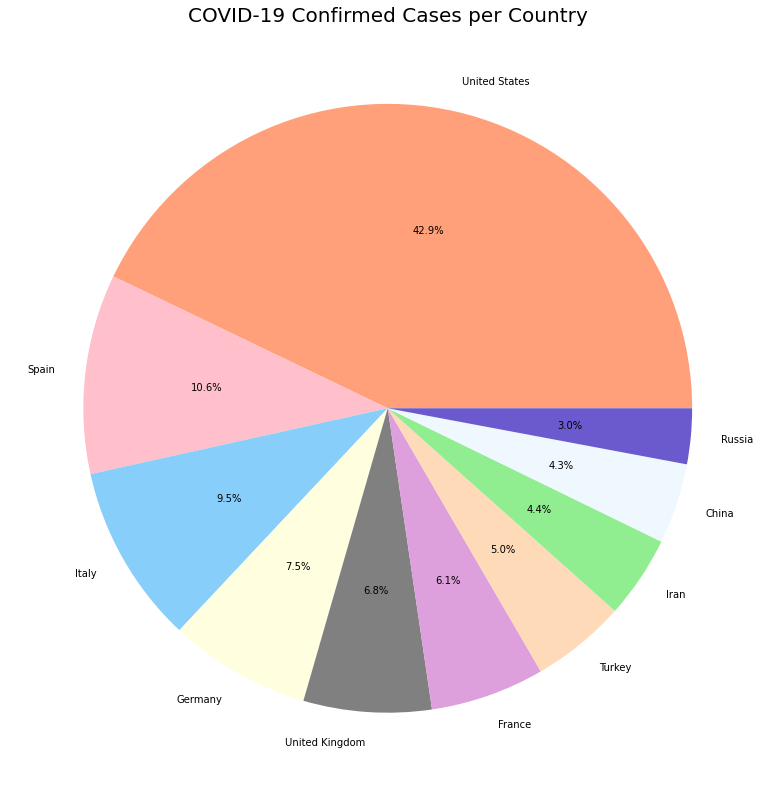

In [12]:
plt.figure(figsize = (14,14))
labels = dff['location'].tolist()
values = dff['total_cases'].tolist()
#Explode = [0, 0, 0.1, 0, 0, 0, 0 , 0 , 0] 
colors=['lightsalmon','pink','lightskyblue',
        'lightyellow','grey','plum','peachpuff',
        'lightgreen','aliceblue','slateblue']
plt.title('COVID-19 Confirmed Cases per Country', size=20)
plt.pie(values,labels = labels, autopct="%.1f%%",colors=colors)#, explode = Explode)
plt.show()

# **Confirmed cases trends**

In [13]:
print('Top 10 countries have the most confirmed cases: {}'. format(labels))

Top 10 countries have the most confirmed cases: ['United States', 'Spain', 'Italy', 'Germany', 'United Kingdom', 'France', 'Turkey', 'Iran', 'China', 'Russia']


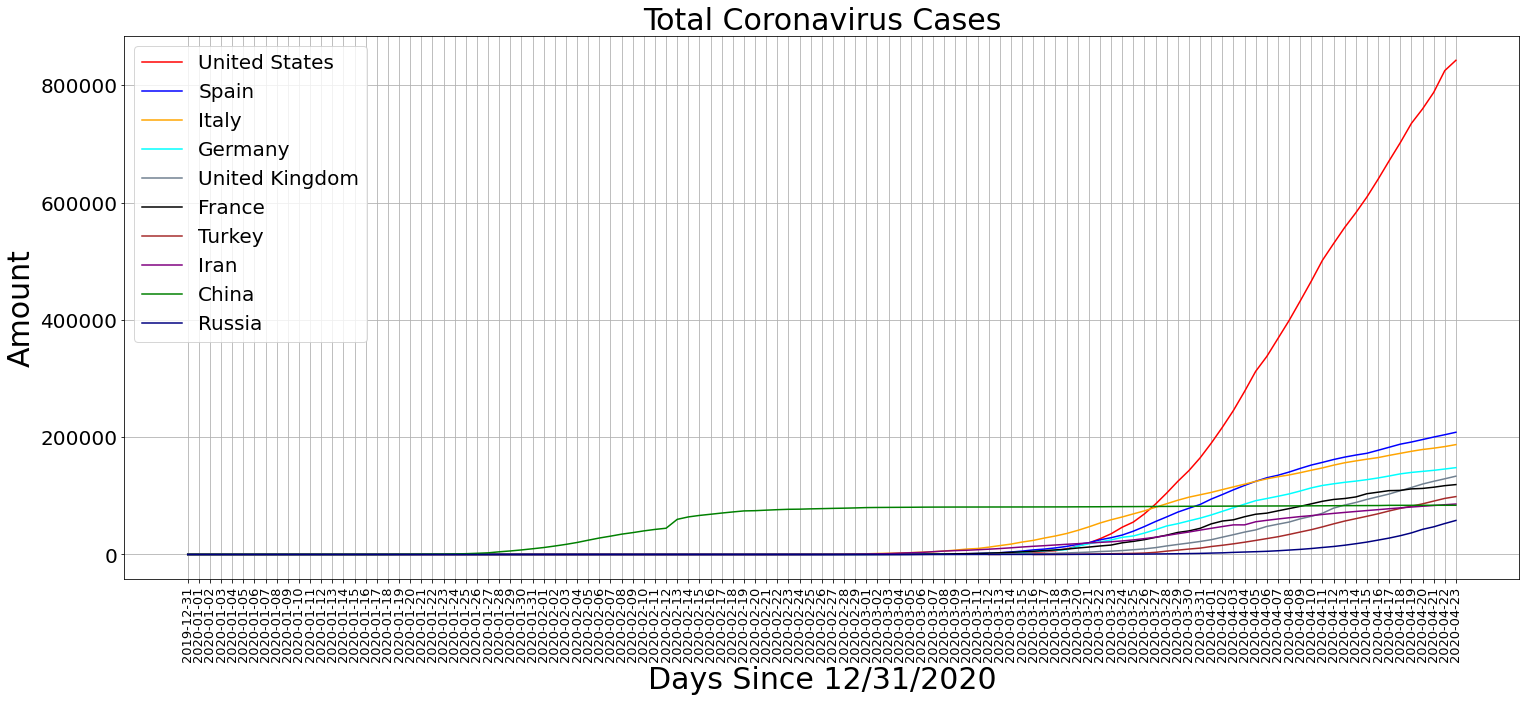

In [14]:
plt.figure(figsize=(25, 10))
plt.plot(totalCases['date'], totalCases['United States'],color='red')
plt.plot(totalCases['date'], totalCases['Spain'],color='blue')
plt.plot(totalCases['date'], totalCases['Italy'],color='orange')
plt.plot(totalCases['date'], totalCases['Germany'],color='cyan')
plt.plot(totalCases['date'], totalCases['United Kingdom'],color='slategray')
plt.plot(totalCases['date'], totalCases['France'],color='black')
plt.plot(totalCases['date'], totalCases['Turkey'],color='brown')
plt.plot(totalCases['date'], totalCases['Iran'],color='purple')
plt.plot(totalCases['date'], totalCases['China'],color='green')
plt.plot(totalCases['date'], totalCases['Russia'],color='navy')
plt.title('Total Coronavirus Cases', size=30)
plt.xlabel('Days Since 12/31/2020', size=30)
plt.ylabel('Amount', size=30)
plt.legend(['United States', 'Spain', 'Italy',
            'Germany', 'United Kingdom',
            'France', 'Turkey', 'Iran',
            'China', 'Russia'], prop={'size': 20})
plt.xticks(rotation = 90,size=13)
plt.yticks(size=20)
plt.grid()
plt.show()

** From this line chart, we can see that except for China the number of cases in all other countries continues to rise. The rising curve of US is the steepest in these 10 countries. The change in quantity is not particularly noticeable before 01/26/2020, so we’ll get rid of this part in the following chart.**

In [15]:
df26 = totalCases.iloc[26:,:]

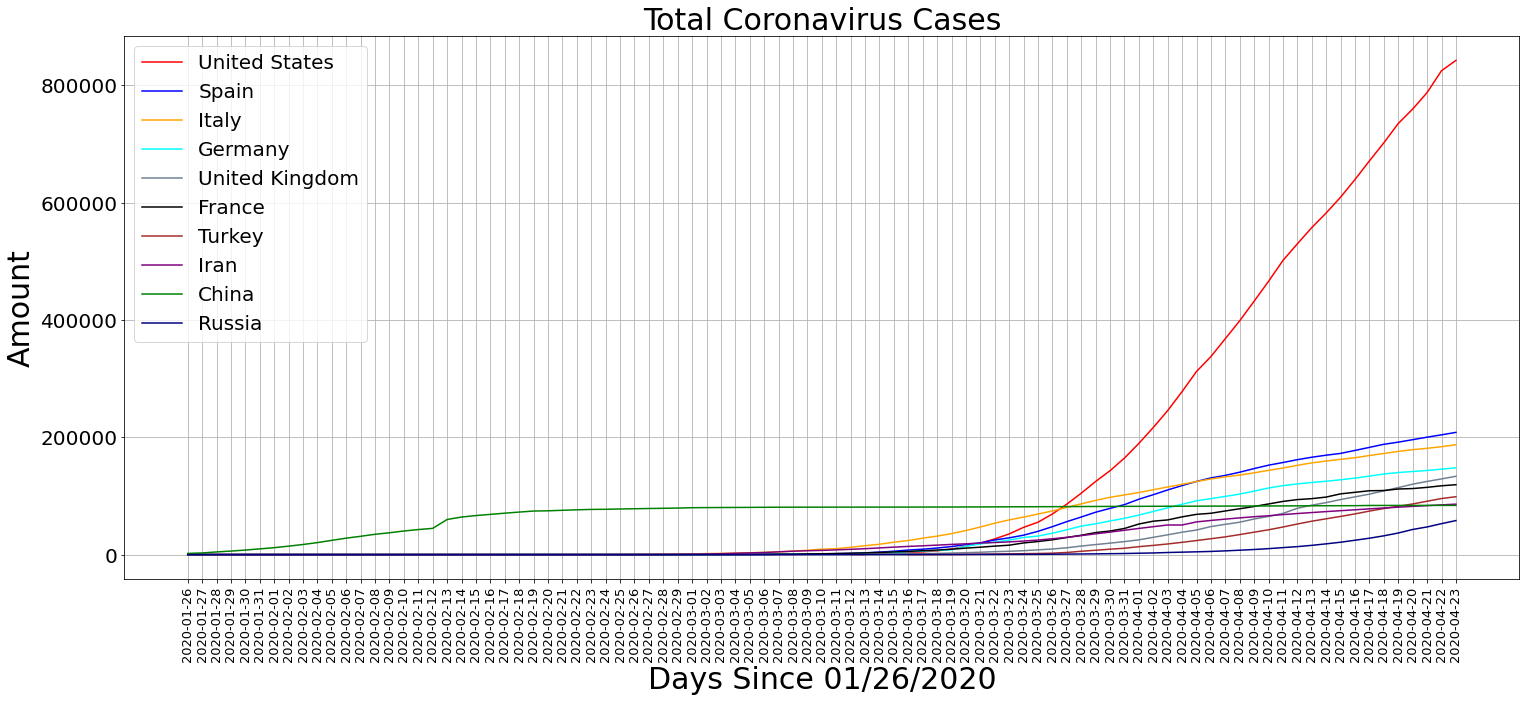

In [16]:
plt.figure(figsize=(25, 10))
plt.plot(df26['date'], df26['United States'],color='red')
plt.plot(df26['date'], df26['Spain'],color='blue')
plt.plot(df26['date'], df26['Italy'],color='orange')
plt.plot(df26['date'], df26['Germany'],color='cyan')
plt.plot(df26['date'], df26['United Kingdom'],color='slategray')
plt.plot(df26['date'], df26['France'],color='black')
plt.plot(df26['date'], df26['Turkey'],color='brown')
plt.plot(df26['date'], df26['Iran'],color='purple')
plt.plot(df26['date'], df26['China'],color='green')
plt.plot(df26['date'], df26['Russia'],color='navy')
plt.title('Total Coronavirus Cases', size=30)
plt.xlabel('Days Since 01/26/2020', size=30)
plt.ylabel('Amount', size=30)
plt.legend(['United States', 'Spain', 'Italy',
            'Germany', 'United Kingdom',
            'France', 'Turkey', 'Iran',
            'China', 'Russia'], prop={'size': 20})
plt.xticks(rotation = 90,size=13)
plt.yticks(size=20)
plt.grid()
plt.show()

**Before 03/27/2020, China had the most confirmed cases. After this date, US continues to have the most confirmed cases.**

**Let's have a look at how death cases look in these countries.**

In [17]:
df_death26 = totalDeath.iloc[26:,:]

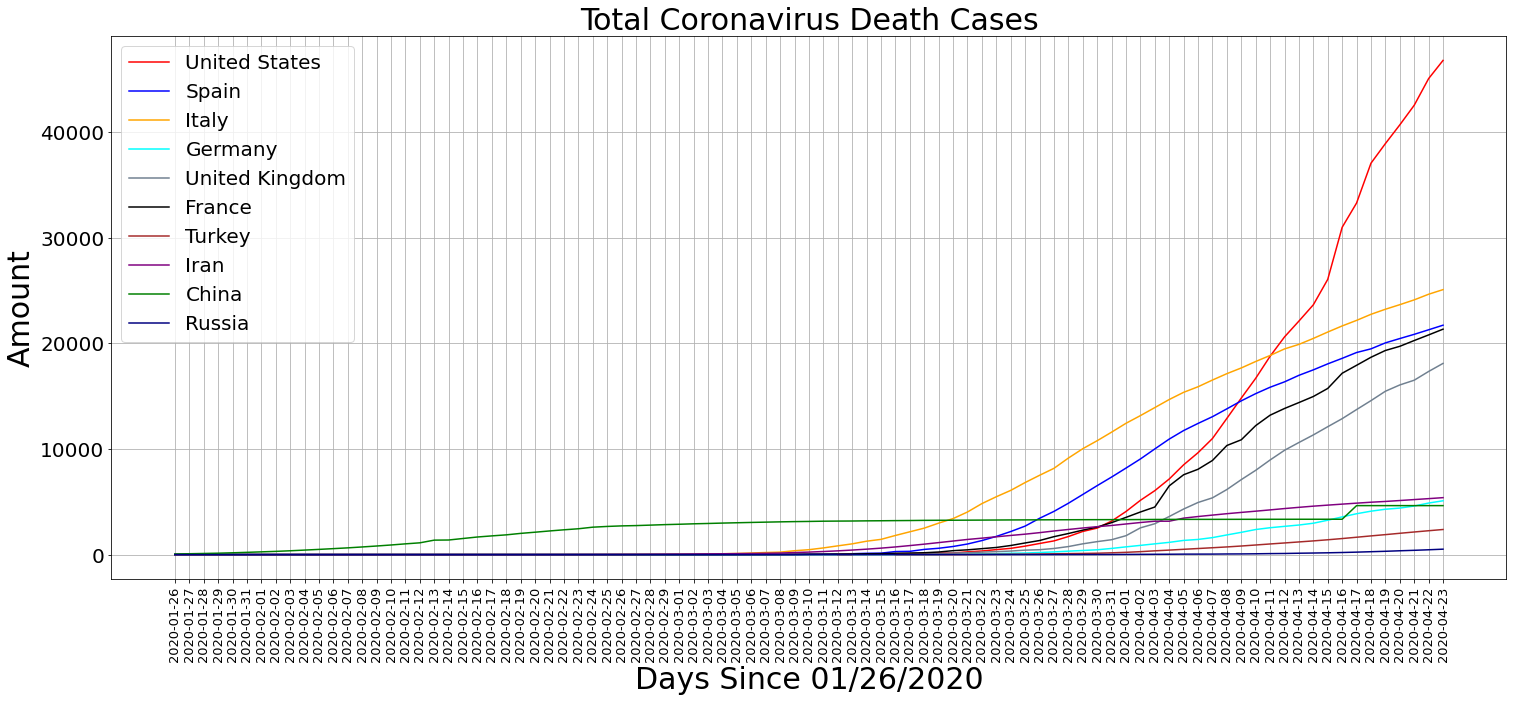

In [18]:
plt.figure(figsize=(25, 10))
plt.plot(df_death26['date'], df_death26['United States'],color='red')
plt.plot(df_death26['date'], df_death26['Spain'],color='blue')
plt.plot(df_death26['date'], df_death26['Italy'],color='orange')
plt.plot(df_death26['date'], df_death26['Germany'],color='cyan')
plt.plot(df_death26['date'], df_death26['United Kingdom'],color='slategray')
plt.plot(df_death26['date'], df_death26['France'],color='black')
plt.plot(df_death26['date'], df_death26['Turkey'],color='brown')
plt.plot(df_death26['date'], df_death26['Iran'],color='purple')
plt.plot(df_death26['date'], df_death26['China'],color='green')
plt.plot(df_death26['date'], df_death26['Russia'],color='navy')
plt.title('Total Coronavirus Death Cases', size=30)
plt.xlabel('Days Since 01/26/2020', size=30)
plt.ylabel('Amount', size=30)
plt.legend(['United States', 'Spain', 'Italy',
            'Germany', 'United Kingdom',
            'France', 'Turkey', 'Iran',
            'China', 'Russia'], prop={'size': 20})
plt.xticks(rotation = 90,size=13)
plt.yticks(size=20)
plt.grid()
plt.show()

### **As we see: **
* **before 03/20/2020, China had the most death cases**
* **from 03/20/2020 to 04/11/2020, Italy had the most death cases**
* **after 04/11/2020, US continues to have the most death cases**
* **after 03/31/2020, death cases in US continues to grow faster than other 9 countries**


# **Analysis on US coronavirus cases**

## **Let's look closer at how the cases look in US in the last 20 days.**

In [19]:
us20 = totalCases.tail(20)

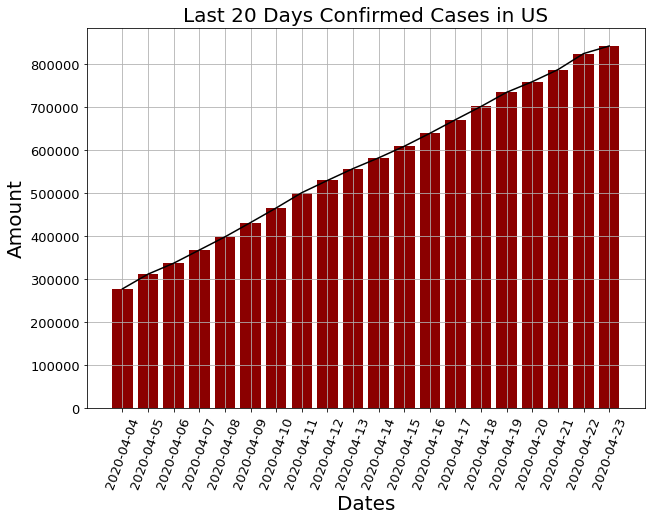

In [20]:
plt.figure(figsize=(10, 7))
plt.bar("date", "United States", data = us20, color = "darkred") 
plt.plot(us20['date'], us20['United States'],color = 'black')
plt.xlabel("Dates", size=20) 
plt.ylabel("Amount", size=20)
plt.title("Last 20 Days Confirmed Cases in US", size=20)
plt.xticks(rotation = 70,size=13)
plt.yticks(size=13)
plt.grid()
plt.show()

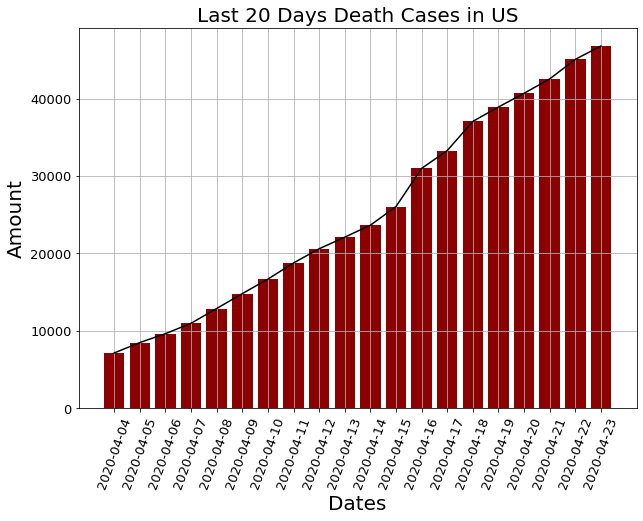

In [21]:
usDeath20 = totalDeath.tail(20)
plt.figure(figsize=(10, 7))
plt.bar("date", "United States", data = usDeath20, color = "darkred") 
plt.plot(usDeath20['date'], usDeath20['United States'],color = 'black')
plt.xlabel("Dates", size=20) 
plt.ylabel("Amount", size=20)
plt.title("Last 20 Days Death Cases in US", size=20)
plt.xticks(rotation = 70,size=13)
plt.yticks(size=13)
plt.grid()
plt.show()

**We can roughly say that the mortality rate is about 6% in US on the last day of the dataset. It means infected people have a 6% chance of dying from coronavirus... **

In [22]:
mortalityRate = (totalDeath['United States'].iloc[-1]) / (totalCases['United States'].iloc[-1])
mortalityRate

0.05552146911630148

In [23]:
newCases20 = newCases.tail(20)
newDeath20 = newDeath.tail(20)

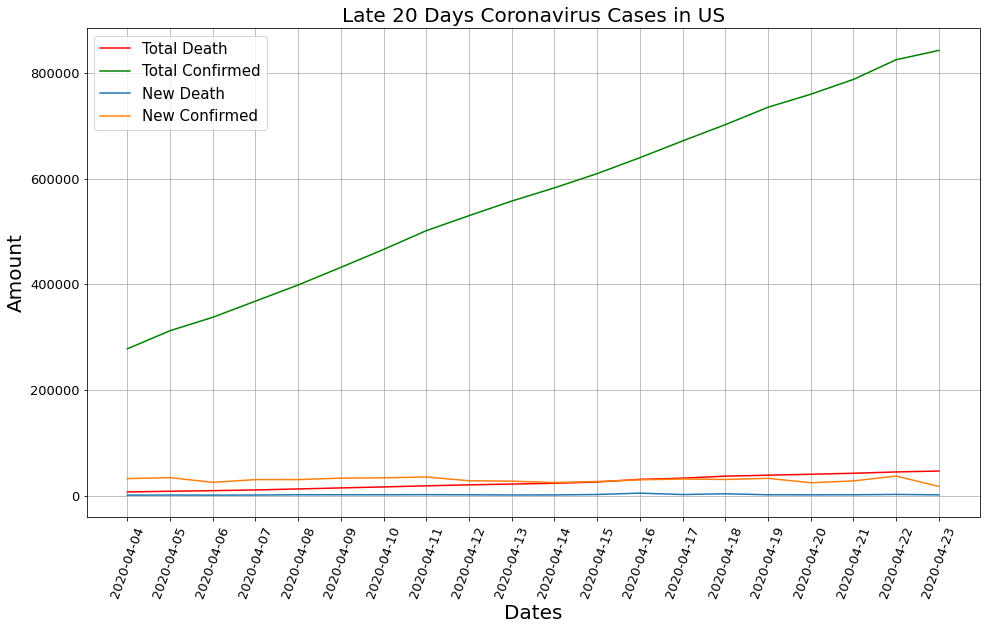

In [24]:
plt.figure(figsize=(16, 9))
plt.plot(usDeath20['date'], usDeath20['United States'],color='red')
plt.plot(us20['date'], us20['United States'],color='green')
plt.plot(newDeath20['date'],newDeath20['United States'])
plt.plot(newCases20['date'],newCases20['United States'])
plt.legend(['Total Death', 'Total Confirmed','New Death','New Confirmed'], prop={'size': 15})
plt.xlabel("Dates", size=20) 
plt.ylabel("Amount", size=20)
plt.title("Late 20 Days Coronavirus Cases in US", size=20)
plt.xticks(rotation = 70,size=13)
plt.yticks(size=13)
plt.grid()
plt.show()

**We can use the line chart and the bar chart to visualize the relationship between new confirmed cases and new death cases in the last 10 days.**

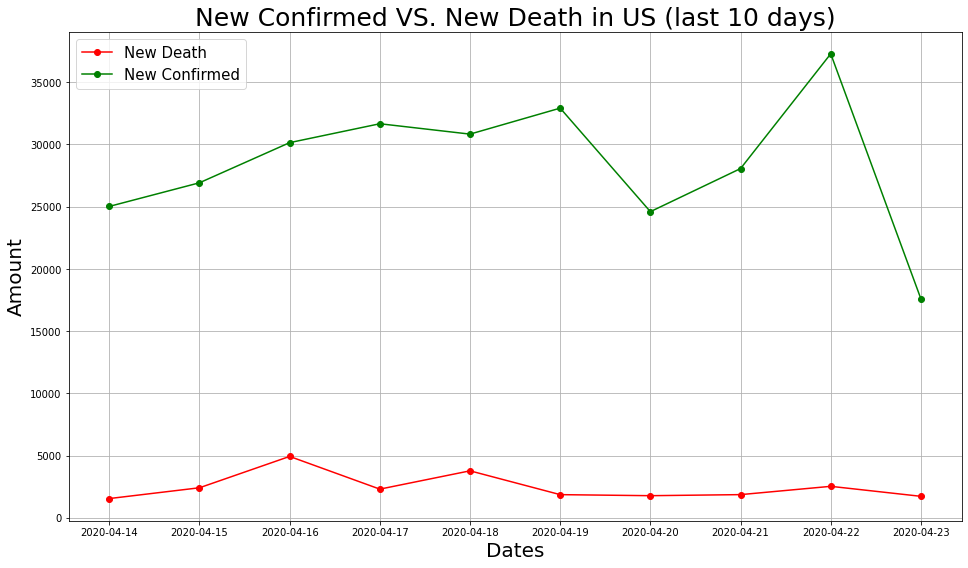

In [25]:
plt.figure(figsize=(16, 9))

newCases10 = newCases.tail(10)
newDeath10 = newDeath.tail(10)

plt.plot(newDeath10['date'],newDeath10['United States'],color = 'r', marker = 'o')
plt.plot(newCases10['date'],newCases10['United States'],color = 'g', marker = 'o')
plt.legend(['New Death','New Confirmed'], prop={'size': 15})
plt.title('New Confirmed VS. New Death in US (last 10 days)',size=25)
plt.ylabel('Amount', size=20)
plt.xlabel('Dates', size=20)
plt.grid()
plt.show()

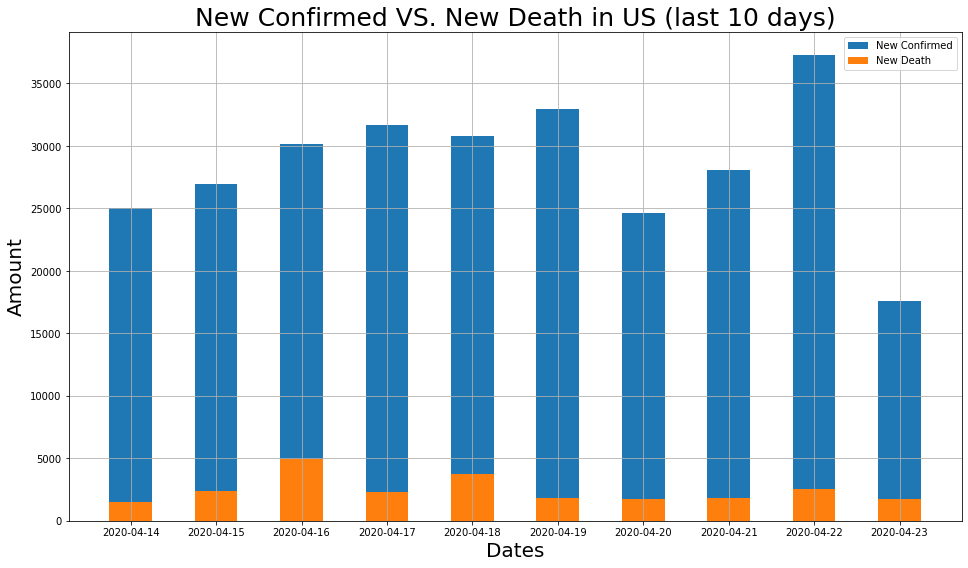

In [26]:
plt.figure(figsize=(16, 9))

newCases10 = newCases.tail(10)
newDeath10 = newDeath.tail(10)
width = 0.5

p1 = plt.bar(newCases10['date'], newCases10['United States'], width)
p2 = plt.bar(newDeath10['date'], newDeath10['United States'], width)

plt.title('New Confirmed VS. New Death in US (last 10 days)',size=25)
plt.ylabel('Amount', size=20)
plt.xlabel('Dates', size=20)
plt.legend((p1[0], p2[0]), ('New Confirmed', 'New Death'))
plt.grid()
plt.show()